In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer


In [ ]:
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")

# Drop unnamed trash columns
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

print("Data Loaded")


Data Loaded


In [ ]:
X_train = train_df.iloc[:, :-1]
y_train = train_df["prognosis"]

X_test = test_df.iloc[:, :-1]
y_test = test_df["prognosis"]


In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_encoded)

print("Training completed")


Training completed


In [ ]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test_encoded, y_pred)

print(f"Model Accuracy: {acc * 100:.2f}%")


Model Accuracy: 97.62%


In [ ]:
symptoms_list = X_train.columns.tolist()


In [ ]:
def predict_disease(input_symptoms):
    input_vector = [1 if symptom in input_symptoms else 0 for symptom in symptoms_list]
    prediction = model.predict([input_vector])[0]
    return le.inverse_transform([prediction])[0]


In [ ]:
remedy_db = {
    "(vertigo) Paroymsal  Positional Vertigo": ("Vestibular therapy, rest, avoid head tilts", "Low"),
    "AIDS": ("Antiretroviral therapy, safe practices, regular monitoring", "Very High"),
    "Acne": ("Topical creams, clean skin, avoid oily foods", "Low"),
    "Alcoholic hepatitis": ("Stop alcohol, liver meds, consult hepatologist", "High"),
    "Allergy": ("Antihistamines, avoid allergens, hydration", "Medium"),
    "Arthritis": ("Pain relief, exercise, consult rheumatologist", "Medium"),
    "Bronchial Asthma": ("Inhalers, avoid triggers, regular check-ups", "High"),
    "Cervical spondylosis": ("Neck support, exercises, pain relief", "Medium"),
    "Chicken pox": ("Rest, calamine lotion, avoid scratching", "Medium"),
    "Chronic cholestasis": ("Medication for bile flow, avoid fatty food", "High"),
    "Common Cold": ("Rest, fluids, steam inhalation", "Low"),
    "Dengue": ("Fluids, platelet monitoring, consult doctor", "High"),
    "Diabetes ": ("Diet control, insulin or meds, check sugar levels", "High"),
    "Dimorphic hemmorhoids(piles)": ("Fiber-rich diet, sitz baths, surgery if needed", "Medium"),
    "Drug Reaction": ("Stop drug, emergency consult", "Very High"),
    "Fungal infection": ("Antifungal creams, hygiene, loose clothes", "Low"),
    "GERD": ("Avoid spicy food, antacids, upright posture", "Medium"),
    "Gastroenteritis": ("Hydration, light meals, antiemetics", "Medium"),
    "Heart attack": ("Emergency care, aspirin, call ambulance", "Very High"),
    "Hepatitis A": ("Rest, hydration, avoid alcohol", "Medium"),
    "Hepatitis B": ("Antivirals, liver care, specialist consultation", "High"),
    "Hepatitis C": ("Antivirals, regular liver tests", "High"),
    "Hepatitis D": ("Specialist treatment, avoid alcohol", "High"),
    "Hepatitis E": ("Clean water, rest, light meals", "Medium"),
    "Hypertension ": ("Low salt diet, meds, BP monitoring", "High"),
    "Hyperthyroidism": ("Beta blockers, thyroid meds", "High"),
    "Hypoglycemia": ("Sugar intake, glucose tabs, emergency care", "Very High"),
    "Hypothyroidism": ("Thyroxine tablets daily, check-ups", "High"),
    "Impetigo": ("Topical antibiotics, hygiene", "Medium"),
    "Jaundice": ("Avoid alcohol and fat, liver meds", "Medium"),
    "Malaria": ("Antimalarial drugs, mosquito nets", "High"),
    "Migraine": ("Pain relief, dark room, hydration", "Medium"),
    "Osteoarthristis": ("Exercise, weight control, pain relief", "Medium"),
    "Paralysis (brain hemorrhage)": ("Emergency hospitalization, neuro support", "Very High"),
    "Peptic ulcer diseae": ("Antacids, avoid NSAIDs, consult gastro", "Medium"),
    "Pneumonia": ("Antibiotics, rest, fluids", "High"),
    "Psoriasis": ("Topical creams, UV therapy, moisturizers", "Medium"),
    "Tuberculosis": ("6-month full treatment, mask use", "Very High"),
    "Typhoid": ("Antibiotics, soft diet, hygiene", "High"),
    "Urinary tract infection": ("Antibiotics, hydration, hygiene", "Medium"),
    "Varicose veins": ("Compression stockings, leg elevation", "Medium")
}


In [ ]:
def get_recommendation(disease):
    return remedy_db.get(
        disease,
        ("Consult a healthcare provider for accurate diagnosis and treatment.", "Medium")
    )


In [ ]:
def suggest_symptoms(partial_input):
    matches = [symptom for symptom in symptoms_list if partial_input.lower() in symptom.lower()]
    return matches


In [ ]:
mlb = MultiLabelBinarizer()

y_train_multilabel = mlb.fit_transform([[d] for d in y_train])
y_test_multilabel = mlb.transform([[d] for d in y_test])

multi_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_model.fit(X_train, y_train_multilabel)

print("Multi-label model trained")


Multi-label model trained


In [ ]:
def predict_possible_diseases(input_symptoms):
    input_vector = [1 if symptom in input_symptoms else 0 for symptom in symptoms_list]
    input_vector = np.array(input_vector).reshape(1, -1)

    probabilities = model.predict_proba(input_vector)[0]
    threshold = 0.1  

    probable_indices = [i for i, prob in enumerate(probabilities) if prob >= threshold]
    possible_diseases = le.inverse_transform(probable_indices)

    return list(possible_diseases)


In [ ]:
partial = input("Type a symptom (or part of it): ")
suggestions = suggest_symptoms(partial)

print("Suggested symptoms:")
for s in suggestions:
    print(" -", s)


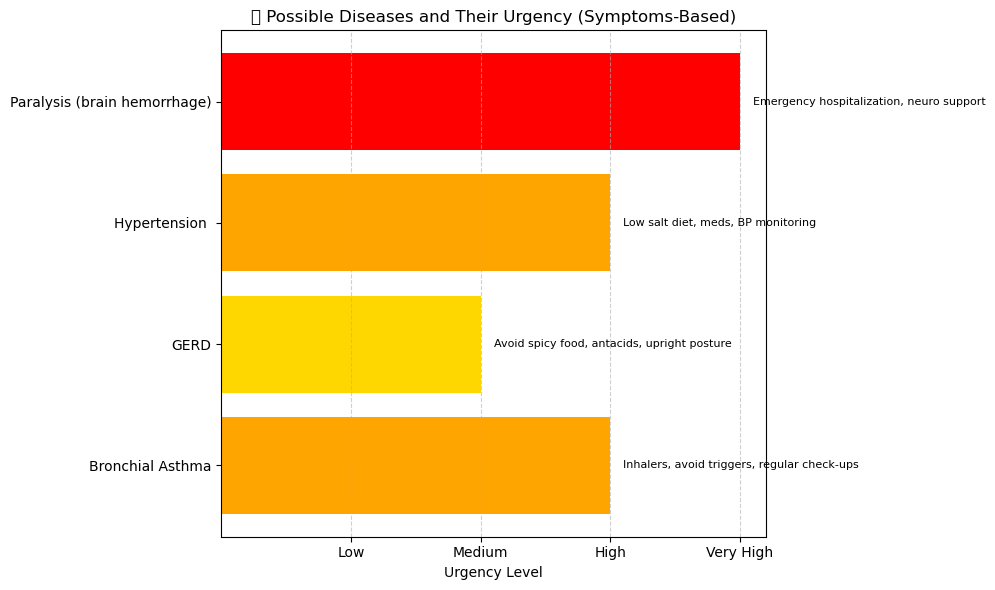

In [ ]:
import matplotlib.pyplot as plt

# Assign numeric values to urgency levels for plotting
urgency_levels = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very High": 4
}

# Run prediction
input_symptoms = ["cough", "fever", "headache"]
matches = predict_possible_diseases(input_symptoms)

disease_names = []
urgency_values = []
urgency_colors = []

urgency_color_map = {
    "Low": "green",
    "Medium": "gold",
    "High": "orange",
    "Very High": "red"
}

# Collect data
for dis in matches:
    remedy, urgency = get_recommendation(dis)
    disease_names.append(dis)
    urgency_values.append(urgency_levels.get(urgency, 0))
    urgency_colors.append(urgency_color_map.get(urgency, "gray"))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(disease_names, urgency_values, color=urgency_colors)
plt.xlabel("Urgency Level")
plt.title("💉 Possible Diseases and Their Urgency (Symptoms-Based)")
plt.yticks(fontsize=10)
plt.xticks([1, 2, 3, 4], ["Low", "Medium", "High", "Very High"])
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Label each bar with the remedy
for i, bar in enumerate(bars):
    remedy, _ = get_recommendation(disease_names[i])
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{remedy}", va='center', fontsize=8)

plt.tight_layout()
plt.show()

